In [ ]:
!pip install catboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from catboost import CatBoostClassifier
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00


In [ ]:
file_path = '/content/StressLevelDataset.csv'
data2 = pd.read_csv(file_path)

In [ ]:
data2.shape

(1100, 21)

In [ ]:
print("Dataset shape (rows, columns):", data2.shape)

Dataset shape (rows, columns): (1100, 21)


In [ ]:
data2.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
list(data2.columns)

['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying',
 'stress_level']

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
print(f"Number of duplicated rows: {data2.duplicated().sum()}")

Number of duplicated rows: 0


In [ ]:
print("\nMissing values per column:")
print(data2.isnull().sum())


Missing values per column:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [ ]:
# nunique value in columns

data2.nunique()

,0
anxiety_level,22
self_esteem,31
mental_health_history,2
depression,28
headache,6
blood_pressure,3
sleep_quality,6
breathing_problem,6
noise_level,6
living_conditions,6


In [ ]:
# We can see that there are no missing values in the Dataset
for col in data2.columns:
    unique_value_list = data2[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {data2[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

anxiety_level has 22 unique values
self_esteem has 31 unique values
mental_health_history contains:			[0 1]
depression has 28 unique values
headache contains:			[2 5 4 3 1 0]
blood_pressure contains:			[1 3 2]
sleep_quality contains:			[2 1 5 4 3 0]
breathing_problem contains:			[4 2 3 1 5 0]
noise_level contains:			[2 3 4 1 0 5]
living_conditions contains:			[3 1 2 4 5 0]
safety contains:			[3 2 4 1 5 0]
basic_needs contains:			[2 3 1 4 5 0]
academic_performance contains:			[3 1 2 4 5 0]
study_load contains:			[2 4 3 5 1 0]
teacher_student_relationship contains:			[3 1 2 4 5 0]
future_career_concerns contains:			[3 5 2 4 1 0]
social_support contains:			[2 1 3 0]
peer_pressure contains:			[3 4 5 2 1 0]
extracurricular_activities contains:			[3 5 2 4 0 1]
bullying contains:			[2 5 1 4 3 0]
stress_level contains:			[1 2 0]


In [ ]:
data2.duplicated().sum()

np.int64(0)

In [ ]:
# Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling
data2 = data2.drop(data2.columns[0], axis=1)
data2

,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,17,0,14,3,1,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1
1096,12,0,8,0,3,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2
1097,26,0,3,1,2,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0
1098,0,1,19,5,3,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2


In [ ]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0
safety,1100.0,2.737273,1.406171,0.0,2.0,2.0,4.0,5.0


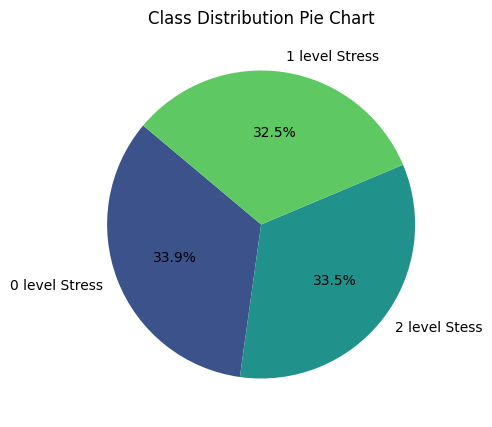

/tmp/ipython-input-15-1830598743.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_labels, y=class_counts, palette='viridis')


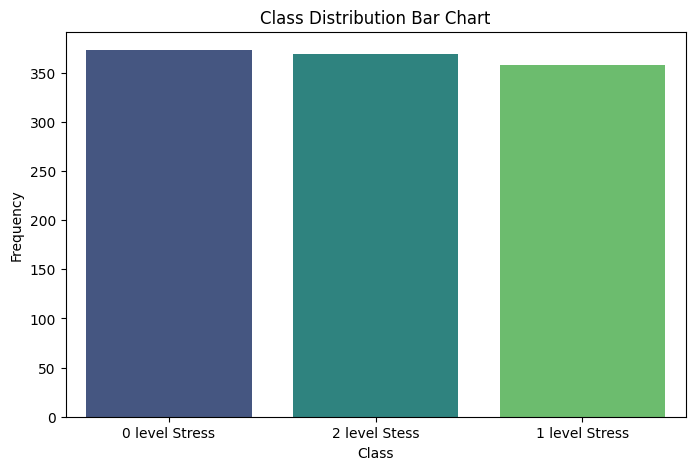

In [ ]:
# Calculate the count of each class in the 'target' column
class_counts = data2['stress_level'].value_counts()

# Create a dictionary to map the existing numeric labels to new descriptive labels for visualization
labels = {
    0: '0 level Stress',
    1: '1 level Stress',
    2: '2 level Stess'


    # Add more mappings as needed
}
# Map the numeric labels to descriptive labels for plotting
new_labels = [labels[i] for i in class_counts.index]

# Pie Chart for class distribution
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=new_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(class_counts)))
plt.title('Class Distribution Pie Chart')
plt.show()

# Bar Chart for class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=new_labels, y=class_counts, palette='viridis')
plt.title('Class Distribution Bar Chart')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

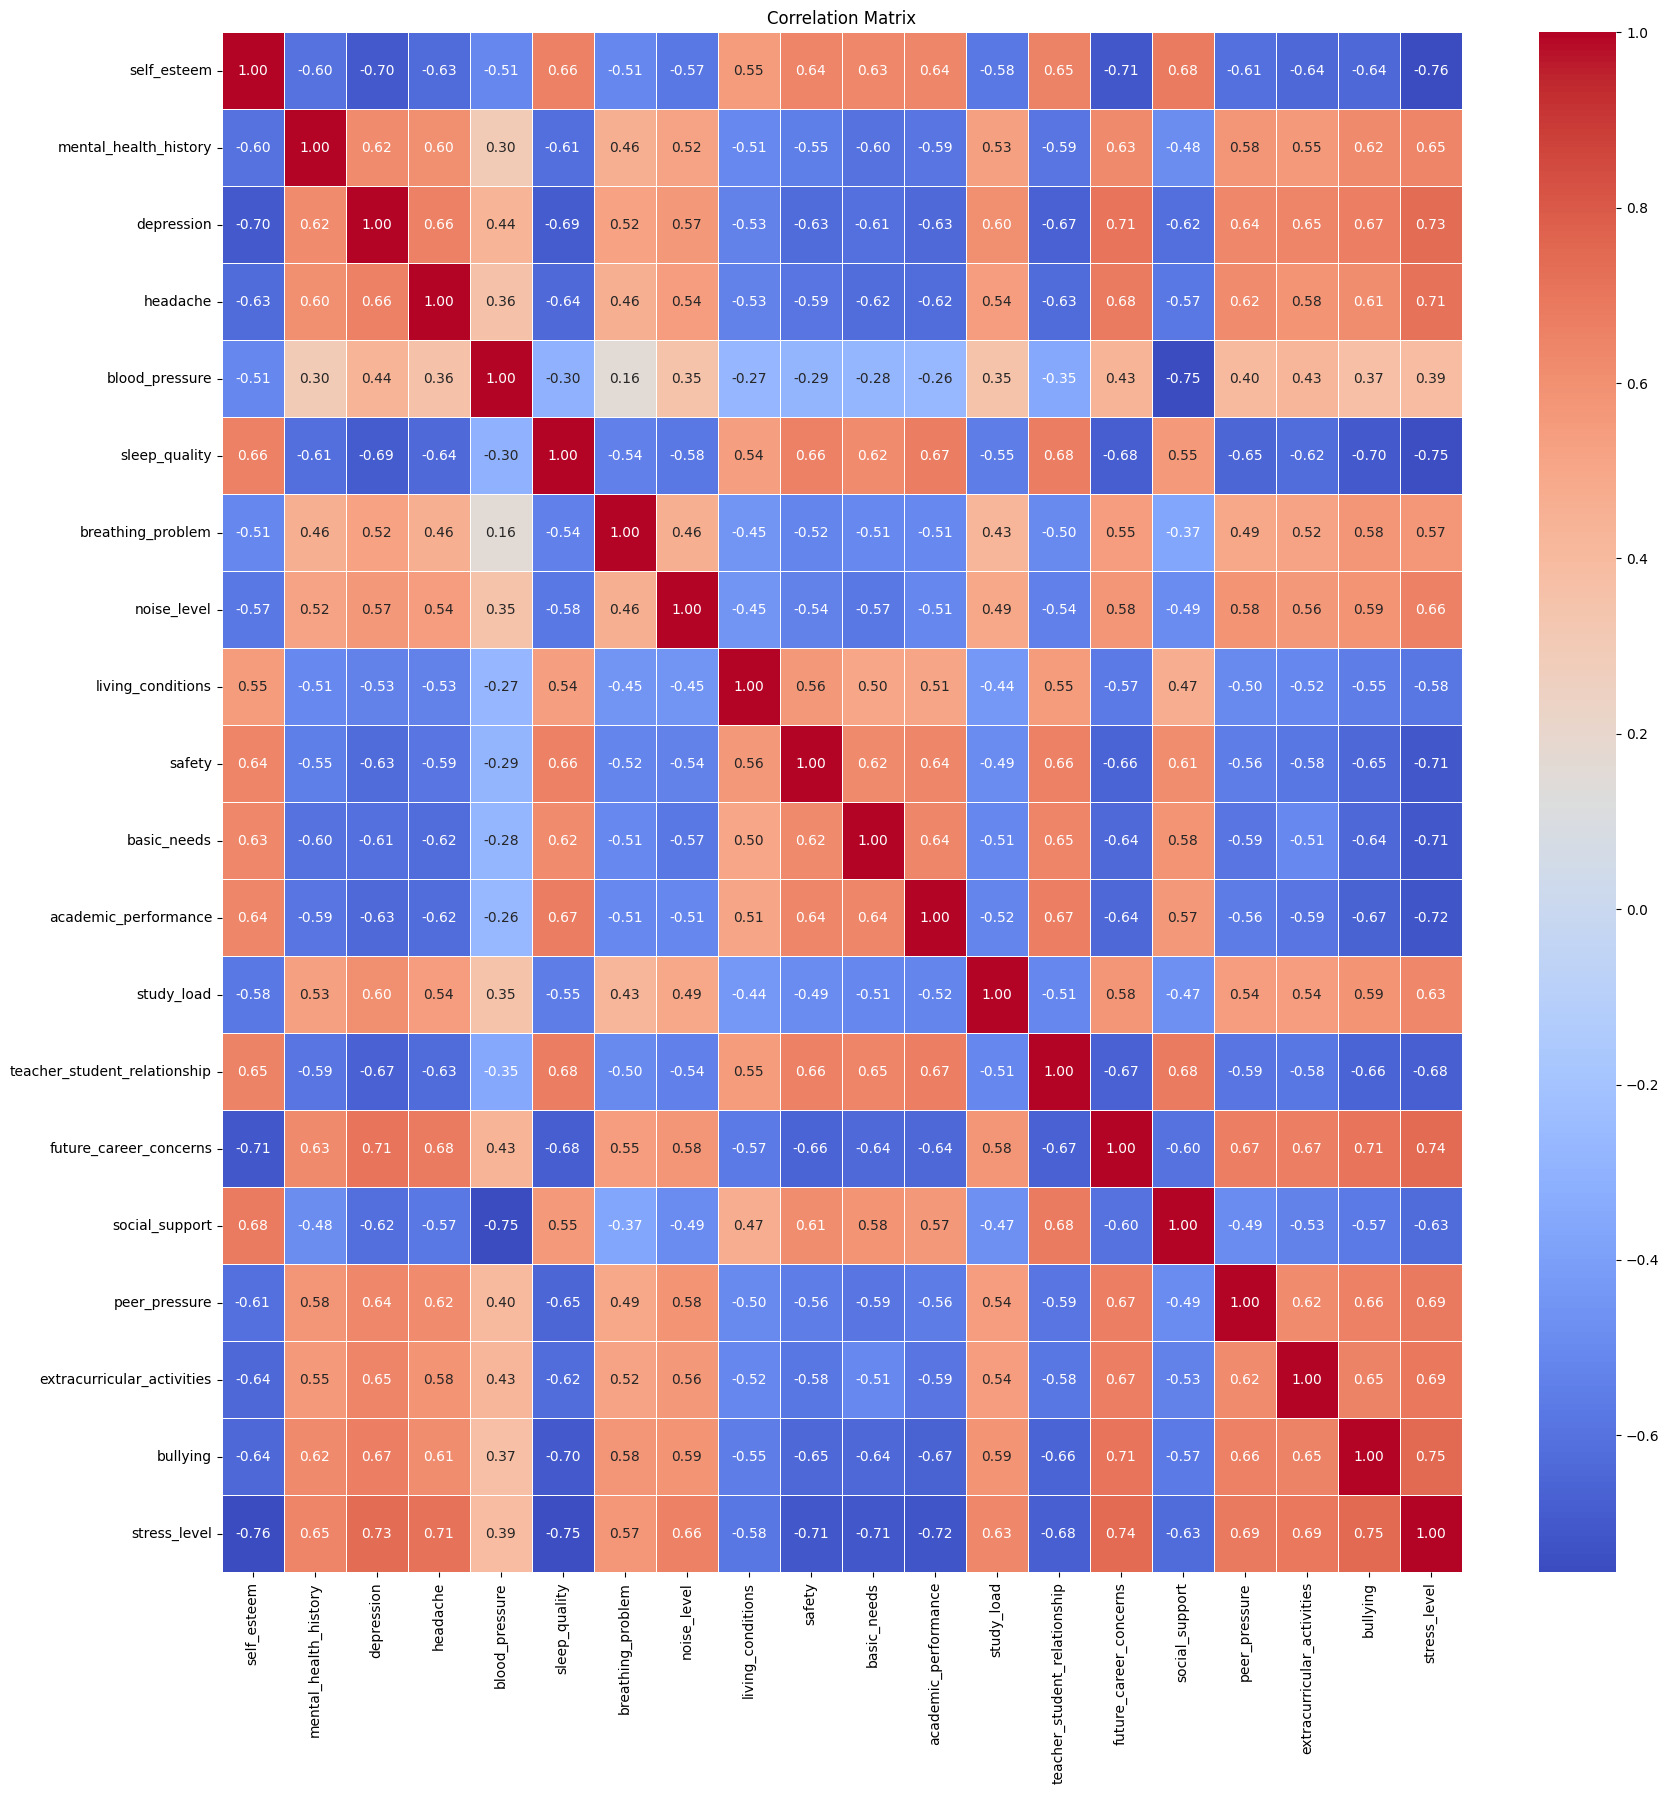

In [ ]:
plt.figure(figsize=(20, 20))
numeric_data = data2.select_dtypes(include=[np.number])  # Select numeric columns only
correlation_matrix = numeric_data.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Automatically encode all object-type columns
label_encoders = {}
for col in data2.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data2[col] = le.fit_transform(data2[col])
    label_encoders[col] = le


In [ ]:
# Creating holders to store the model performance results
ML_Model = []
ML_Config = []
accuracy = []
f1_score = []
recall = []
precision = []
auc_roc = []  # Adding a holder for AUC-ROC

# Function to call for storing the results
def storeResults(model,config, a, b, c, d, e):
    ML_Model.append(model)
    ML_Config.append(config)
    accuracy.append(round(a, 6))
    f1_score.append(round(b, 6))
    recall.append(round(c, 6))
    precision.append(round(d, 6))
    auc_roc.append(round(e, 6))

# SVM


In [ ]:

X = data2.drop(columns=["stress_level"])  # Replace with correct target if needed
y = data2["stress_level"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with SVM
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')  # Using a linear kernel for feature selection

rfecv = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run SVM with Hyperparameter Tuning on different configurations
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

# Defining an expanded parameter grid for hyperparameter tuning
# Perfect expanded parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid'],          # Different kernel types
    'degree': [2, 3, 4],                           # Only used for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5, 1.0]                  # Used in 'poly' and 'sigmoid'
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")
    svc = GridSearchCV(SVC(probability=True), param_grid, cv=3, n_jobs=-1, verbose=2)
    svc.fit(X_train_cfg, y_train_cfg)

    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)


    y_train_svc_proba = svc.predict_proba(X_train_cfg)
    y_test_svc_proba = svc.predict_proba(X_test_cfg)


    # Computing the metrics for the Support Vector Machine model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
                   metrics.f1_score(y_train_cfg, y_train_svc, average='macro'),
                       metrics.f1_score(y_test, y_test_svc, average='macro'),
                    ],
        "Recall": [
                metrics.recall_score(y_train_cfg, y_train_svc, average='macro'),
                   metrics.recall_score(y_test, y_test_svc, average='macro'),
               ],
               "Precision": [
              metrics.precision_score(y_train_cfg, y_train_svc, average='macro'),
                     metrics.precision_score(y_test, y_test_svc, average='macro'),
                       ],
         "AUC-ROC": [
                   metrics.roc_auc_score(pd.get_dummies(y_train_cfg), y_train_svc_proba, multi_class='ovr', average='macro'),
                  metrics.roc_auc_score(pd.get_dummies(y_test), y_test_svc_proba, multi_class='ovr', average='macro'),
               ]

    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    auc_score = metrics.roc_auc_score(pd.get_dummies(y_test), y_test_svc_proba, multi_class='ovr', average='macro')
    storeResults( 'Support Vector Machine',name,
               metrics.accuracy_score(y_test, y_test_svc),
               metrics.f1_score(y_test, y_test_svc, average='macro'),
               metrics.recall_score(y_test, y_test_svc, average='macro'),
               metrics.precision_score(y_test, y_test_svc, average='macro'),auc_score
               )

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 15

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 13

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 10

=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with Original Data configuration...
Fitting 3 folds for each of 900 candidates, totalling 2700 fits

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.949091  0.949108 0.948753   0.949942 0.994549
    Test  0.880000  0.880411 0.880275   0.880955 0.959394
Best hyperparameters found by GridSearchCV:
{'C': 100, 'coef0': 1.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}

Running SVM with Normalized Data configuration...
Fitting 3 folds for each of 900 candidates, totalling 2700 fits

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Preci

# Random Forest

In [ ]:
X = data2.drop(columns=["stress_level"])  # Replace with correct target if needed
y = data2["stress_level"]
# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(RandomForestClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with RandomForestClassifier
print("\n=== RFECV Feature Selection with Random Forest ===")
rf_estimator = RandomForestClassifier()

rfecv = RFECV(estimator=rf_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=rf_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run RandomForestClassifier with Hyperparameter Tuning on different configurations
print("\n=== Random Forest Model Performance with Hyperparameter Tuning ===")

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy']
}


for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Random Forest with {name} configuration...")

    # GridSearchCV to find the best parameters for the RandomForestClassifier
    rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,n_jobs=-1, verbose=1 )  # 5-fold cross-validation

    # Fitting the model for grid search with the training data
    rf.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_rf = rf.predict(X_train_cfg)
    y_test_rf = rf.predict(X_test_cfg)


    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_rf_proba = rf.predict_proba(X_train_cfg) # Probability scores for the positive class
    y_test_rf_proba = rf.predict_proba(X_test_cfg)

    # Computing the metrics for the Random Forest model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_rf),
            metrics.accuracy_score(y_test, y_test_rf),
        ],
        "F1 Score": [
                   metrics.f1_score(y_train_cfg, y_train_rf, average='macro'),
                       metrics.f1_score(y_test, y_test_rf, average='macro'),
                    ],
        "Recall": [
                metrics.recall_score(y_train_cfg, y_train_rf, average='macro'),
                   metrics.recall_score(y_test, y_test_rf, average='macro'),
               ],
               "Precision": [
              metrics.precision_score(y_train_cfg, y_train_rf, average='macro'),
                     metrics.precision_score(y_test, y_test_rf, average='macro'),
                       ],
         "AUC-ROC": [
                   metrics.roc_auc_score(pd.get_dummies(y_train_cfg), y_train_rf_proba, multi_class='ovr', average='macro'),
                  metrics.roc_auc_score(pd.get_dummies(y_test), y_test_rf_proba, multi_class='ovr', average='macro'),
               ]

    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nRandom Forest Model Performance Metrics")
    print(df_metrics.to_string(index=False))
    auc_score = metrics.roc_auc_score(pd.get_dummies(y_test), y_test_rf_proba, multi_class='ovr', average='macro')
    # Storing the results, now including the AUC-ROC score
    storeResults('Random Forest', name,
             metrics.accuracy_score(y_test, y_test_rf),
             metrics.f1_score(y_test, y_test_rf, average='macro'),
             metrics.recall_score(y_test, y_test_rf, average='macro'),
             metrics.precision_score(y_test, y_test_rf, average='macro'),
             auc_score)

# Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(rf.best_params_)



=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 2

=== RFECV Feature Selection with Random Forest ===
Optimal number of features selected by RFECV: 2

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 2

=== Random Forest Model Performance with Hyperparameter Tuning ===

Running Random Forest with Original Data configuration...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  1.000000  1.000000 1.000000   1.000000 1.000000
    Test  0.890909  0.891175 0.891525   0.892695 0.986649

Running Random Forest with Normalized Data configuration...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  1.000000  1.000000 1.000000   1.000000 1.000000
    Test  0.890909  0.890956 

#Gradient Boosting

In [ ]:
# Assuming X and y are your features and labels
X = data2.drop(columns=["stress_level"])  # Replace with correct target if needed
y = data2["stress_level"]
# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(GradientBoostingClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with GradientBoostingClassifier
print("\n=== RFECV Feature Selection with Gradient Boosting ===")
gbc_estimator = GradientBoostingClassifier()

rfecv = RFECV(estimator=gbc_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=gbc_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run GradientBoostingClassifier with Hyperparameter Tuning on different configurations
print("\n=== Gradient Boosting Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8],
    'max_features': ['sqrt']
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Gradient Boosting with {name} configuration...")

    # GridSearchCV to find the best parameters for the GradientBoostingClassifier
    gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5,n_jobs=-1, verbose=1)

    # Fitting the model for grid search with the training data
    gbc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_gbc = gbc.predict(X_train_cfg)
    y_test_gbc = gbc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_gbc_proba = gbc.predict_proba(X_train_cfg) # Probability scores for the positive class
    y_test_gbc_proba = gbc.predict_proba(X_test_cfg)
    # Computing the metrics for the Gradient Boosting model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_gbc),
            metrics.accuracy_score(y_test, y_test_gbc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_gbc, average='macro'),
            metrics.f1_score(y_test, y_test_gbc, average='macro'),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_gbc, average='macro'),
            metrics.recall_score(y_test, y_test_gbc, average='macro'),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_gbc, average='macro'),
            metrics.precision_score(y_test, y_test_gbc, average='macro'),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(pd.get_dummies(y_train_cfg), gbc.predict_proba(X_train_cfg), multi_class='ovr', average='macro'),
        metrics.roc_auc_score(pd.get_dummies(y_test), gbc.predict_proba(X_test_cfg), multi_class='ovr', average='macro'),

        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nGradient Boosting Model Performance Metrics")
    print(df_metrics.to_string(index=False))
    auc_score = metrics.roc_auc_score(pd.get_dummies(y_test), y_test_rf_proba, multi_class='ovr', average='macro')
    # Storing the results, now including the AUC-ROC score
    storeResults('Gradient Boosting',
                 name,
                 metrics.accuracy_score(y_test, y_test_gbc),
                 metrics.f1_score(y_test, y_test_gbc,average='macro'),
                 metrics.recall_score(y_test, y_test_gbc,average='macro'),
                 metrics.precision_score(y_test, y_test_gbc,average='macro'),
                 auc_score
                 )

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(gbc.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 2

=== RFECV Feature Selection with Gradient Boosting ===
Optimal number of features selected by RFECV: 2

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 2

=== Gradient Boosting Model Performance with Hyperparameter Tuning ===

Running Gradient Boosting with Original Data configuration...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Gradient Boosting Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  1.000000  1.000000 1.000000   1.000000 1.000000
    Test  0.872727  0.872987 0.873308   0.873418 0.985506
Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

Running Gradient Boosting with Normalized Data configuration...
Fitting 5 folds for each of 32 cand

#Cat Bosting

In [ ]:
# Assuming X and y are your features and labels
X = data2.drop(columns=["stress_level"])  # Replace with correct target if needed
y = data2["stress_level"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(CatBoostClassifier(silent=True), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with CatBoostClassifier
print("\n=== RFECV Feature Selection with CatBoost ===")
cat_estimator = CatBoostClassifier(silent=True)

rfecv = RFECV(estimator=cat_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=cat_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run CatBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== CatBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'depth': [6, 8, 10],
    'iterations': [200, 300, 400]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning CatBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the CatBoostClassifier
    cat = GridSearchCV(CatBoostClassifier(silent=True), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    cat.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_cat = cat.predict(X_train_cfg)
    y_test_cat = cat.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_cat_proba = cat.predict_proba(X_train_cfg) # Probability scores for the positive class
    y_test_cat_proba = cat.predict_proba(X_test_cfg)
    # Computing the metrics for the CatBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_cat),
            metrics.accuracy_score(y_test, y_test_cat),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_cat),
            metrics.f1_score(y_test, y_test_cat),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_cat),
            metrics.recall_score(y_test, y_test_cat),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_cat),
            metrics.precision_score(y_test, y_test_cat),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_cat_proba),
            metrics.roc_auc_score(y_test, y_test_cat_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nCatBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))
    #auc_score = metrics.roc_auc_score(pd.get_dummies(y_test), y_test_rf_proba, multi_class='ovr', average='macro')
    # Storing the results, now including the AUC-ROC score
    storeResults('CatBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_cat),
                 metrics.f1_score(y_test, y_test_cat, average='macro'),
                 metrics.recall_score(y_test, y_test_cat, average='macro'),
                 metrics.precision_score(y_test, y_test_cat, average='macro'),
                 auc_score = metrics.roc_auc_score(pd.get_dummies(y_test), y_test_rf_proba, multi_class='ovr', average='macro')

                )

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(cat.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 22

=== RFECV Feature Selection with CatBoost ===
Optimal number of features selected by RFECV: 22

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 20

=== CatBoost Model Performance with Hyperparameter Tuning ===

Running CatBoost with Original Data configuration...


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Adaboost

# XGBoost

In [ ]:
# Assuming X and y are your features and labels
X = data2.drop(columns=["stress_level"])  # Replace with correct target if needed
y = data2["stress_level"]
# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(AdaBoostClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with AdaBoostClassifier
print("\n=== RFECV Feature Selection with AdaBoost ===")
ada_estimator = AdaBoostClassifier()

rfecv = RFECV(estimator=ada_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=ada_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run AdaBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== AdaBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning AdaBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the AdaBoostClassifier
    ada = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    ada.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_ada = ada.predict(X_train_cfg)
    y_test_ada = ada.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_ada_proba = ada.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_ada_proba = ada.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the AdaBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_ada),
            metrics.accuracy_score(y_test, y_test_ada),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_ada),
            metrics.f1_score(y_test, y_test_ada),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_ada),
            metrics.recall_score(y_test, y_test_ada),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_ada),
            metrics.precision_score(y_test, y_test_ada),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_ada_proba),
            metrics.roc_auc_score(y_test, y_test_ada_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nAdaBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('AdaBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_ada),
                 metrics.f1_score(y_test, y_test_ada),
                 metrics.recall_score(y_test, y_test_ada),
                 metrics.precision_score(y_test, y_test_ada),
                 metrics.roc_auc_score(y_test, y_test_ada_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(ada.best_params_)

In [ ]:
# Assuming X and y are your features and labels
X = data2.drop(columns=["stress_level"])  # Replace with correct target if needed
y = data2["stress_level"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with XGBoost
print("\n=== RFECV Feature Selection with XGBoost ===")
xgb_estimator = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

rfecv = RFECV(estimator=xgb_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=xgb_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run XGBoost with Hyperparameter Tuning on different configurations
print("\n=== XGBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning XGBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the XGBoost model
    xgbm = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    xgbm.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_xgbm = xgbm.predict(X_train_cfg)
    y_test_xgbm = xgbm.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_xgbm_proba = xgbm.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_xgbm_proba = xgbm.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the XGBoost model
    metrics_dict = {
       "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_xgbm),
            metrics.accuracy_score(y_test, y_test_xgbm),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_xgbm),
            metrics.f1_score(y_test, y_test_xgbm),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_xgbm),
            metrics.recall_score(y_test, y_test_xgbm),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_xgbm),
            metrics.precision_score(y_test, y_test_xgbm),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_xgbm_proba),
            metrics.roc_auc_score(y_test, y_test_xgbm_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nXGBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('XGBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_xgbm),
                 metrics.f1_score(y_test, y_test_xgbm, average='macro'),
                 metrics.recall_score(y_test, y_test_xgbm, average='macro'),
                 metrics.precision_score(y_test, y_test_xgbm, average='macro'),
                 metrics.roc_auc_score(y_test, y_test_xgbm_proba, average='macro'))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(xgbm.best_params_)

In [ ]:
# Creating the dataframe
result = pd.DataFrame({
    'ML Model' : ML_Model,
    'Configuration': ML_Config,
    'Accuracy' : [f"{acc * 100:.3f}%" for acc in accuracy],
    'F1 Score' : [f"{f1 * 100:.3f}%" for f1 in f1_score],
    'Recall'   : [f"{rec * 100:.3f}%" for rec in recall],
    'Precision': [f"{prec * 100:.3f}%" for prec in precision],
    'ROC_AUC'  : [f"{roc * 100:.3f}%" for roc in auc_roc],
})

# Displaying the result
result.drop_duplicates(subset=["ML Model", "Configuration"], inplace=True)
print(result)

# Saving the result to a CSV file
result.to_csv('model_results6.csv', index=False)

# Sorting the dataframe on accuracy and F1 Score
sorted_result = result.sort_values(by=['Accuracy', 'F1 Score'], ascending=False).reset_index(drop=True)

# Displaying the sorted result
print(sorted_result)

# Saving the sorted result to a CSV file
sorted_result.to_csv('sorted_model_results6.csv', index=False)

                  ML Model    Configuration Accuracy F1 Score   Recall  \
0   Support Vector Machine    Original Data  88.000%  88.041%  88.028%   
1   Support Vector Machine  Normalized Data  89.091%  89.108%  89.153%   
4   Support Vector Machine      SelectKBest  87.636%  87.614%  87.621%   
5   Support Vector Machine            RFECV  88.000%  87.978%  87.983%   
6   Support Vector Machine              PCA  88.364%  88.337%  88.355%   
7            Random Forest    Original Data  89.091%  89.118%  89.153%   
8            Random Forest  Normalized Data  89.091%  89.096%  89.124%   
9            Random Forest      SelectKBest  92.000%  92.005%  92.083%   
10           Random Forest            RFECV  92.000%  92.005%  92.083%   
11           Random Forest              PCA  92.000%  92.002%  92.111%   
12       Gradient Boosting    Original Data  87.273%  87.299%  87.331%   
13       Gradient Boosting  Normalized Data  87.273%  87.287%  87.347%   
14       Gradient Boosting      Select